In [1]:
import pandas as pd
import geopandas as gpd

In [24]:
import datetime

In [2]:
pd.set_option('display.max_columns', None)

In [3]:
crash_data = pd.read_csv('vision_zero.csv')

/tmp/ipykernel_56266/3651142311.py:1: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  crash_data = pd.read_csv('vision_zero.csv')


In [4]:
crash_data_geographic = gpd.GeoDataFrame(
    crash_data, geometry=gpd.points_from_xy(crash_data.longitude, crash_data.latitude))

In [53]:
crash_data_geographic['crash_date'] = pd.to_datetime(crash_data_geographic['crash_date'])

<AxesSubplot:>

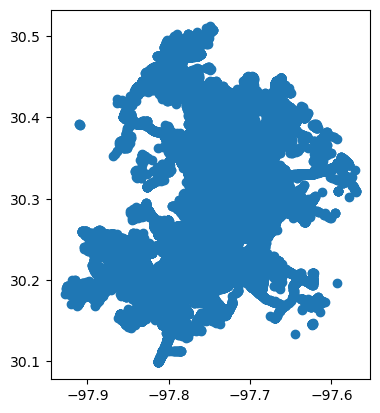

In [5]:
crash_data_geographic.plot()

In [15]:
crash_data_geographic

,crash_id,crash_fatal_fl,crash_date,crash_time,case_id,rpt_latitude,rpt_longitude,rpt_block_num,rpt_street_pfx,rpt_street_name,rpt_street_sfx,crash_speed_limit,road_constr_zone_fl,latitude,longitude,street_name,street_nbr,street_name_2,street_nbr_2,crash_sev_id,sus_serious_injry_cnt,nonincap_injry_cnt,poss_injry_cnt,non_injry_cnt,unkn_injry_cnt,tot_injry_cnt,death_cnt,contrib_factr_p1_id,contrib_factr_p2_id,units_involved,atd_mode_category_metadata,pedestrian_fl,motor_vehicle_fl,motorcycle_fl,bicycle_fl,other_fl,point,apd_confirmed_fatality,apd_confirmed_death_count,motor_vehicle_death_count,motor_vehicle_serious_injury_count,bicycle_death_count,bicycle_serious_injury_count,pedestrian_death_count,pedestrian_serious_injury_count,motorcycle_death_count,motorcycle_serious_injury_count,other_death_count,other_serious_injury_count,onsys_fl,private_dr_fl,geometry
0,13679371,N,01/23/2014 09:14:00 PM,21:14:00,140231646,NaN,NaN,NaN,NaN,PACK SADDLE PASS,NaN,25.0,N,NaN,NaN,PACK SADDLE PASS,NaN,NaN,NaN,2,0,1.0,0.0,1.0,0.0,1.0,0,NaN,NaN,Large passenger vehicle,"[{""mode_id"": 2, ""mode_desc"": ""Large passenger ...",NaN,Y,NaN,NaN,NaN,NaN,N,0,0,0,0,0,0,0,0,0,0,0,N,N,POINT (nan nan)
1,13764688,N,01/18/2014 06:48:00 PM,18:48:00,140181377,NaN,NaN,1300,NaN,NOT REPORTED,NaN,65.0,N,NaN,NaN,FM1327,NaN,BRADSHAW RD,NaN,5,0,0.0,0.0,1.0,0.0,0.0,0,NaN,NaN,Large passenger vehicle,"[{""mode_id"": 2, ""mode_desc"": ""Large passenger ...",NaN,Y,NaN,NaN,NaN,NaN,N,0,0,0,0,0,0,0,0,0,0,0,Y,N,POINT (nan nan)
2,13866012,N,05/27/2014 11:29:00 PM,23:29:00,141471886,NaN,NaN,NaN,NaN,8405 TECUMSEH,DR,-1.0,N,NaN,NaN,8405 TECUMSEH DR,NaN,NaN,NaN,0,0,0.0,0.0,0.0,0.0,0.0,0,22.0,NaN,Passenger car,"[{""mode_id"": 1, ""mode_desc"": ""Passenger car"", ...",NaN,Y,NaN,NaN,NaN,NaN,N,0,0,0,0,0,0,0,0,0,0,0,N,N,POINT (nan nan)
3,13900597,N,06/25/2014 09:49:00 PM,21:49:00,141761765,NaN,NaN,NaN,NaN,5600 RAIN CREEK,PKWY,-1.0,N,NaN,NaN,5600 RAIN CREEK PKWY,NaN,NaN,NaN,3,0,0.0,1.0,1.0,0.0,1.0,0,NaN,NaN,Passenger car,"[{""mode_id"": 1, ""mode_desc"": ""Passenger car"", ...",NaN,Y,NaN,NaN,NaN,NaN,N,0,0,0,0,0,0,0,0,0,0,0,N,N,POINT (nan nan)
4,13197259,N,03/24/2013 03:02:00 AM,03:02:00,13-830380,NaN,NaN,NaN,E,WILLIAM CANNON,DR,30.0,N,30.179615,-97.746922,E WILLIAM CANNON DR,NaN,S PLEASANT VALLEY RD,NaN,5,0,0.0,0.0,1.0,0.0,0.0,0,NaN,NaN,Large passenger vehicle,"[{""mode_id"": 2, ""mode_desc"": ""Large passenger ...",NaN,Y,NaN,NaN,NaN,POINT (-97.74692247 30.1796148),N,0,0,0,0,0,0,0,0,0,0,0,N,N,POINT (-97.74692 30.17961)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149815,19352679,N,01/24/2023 07:28:00 AM,07:28:00,230240270,NaN,NaN,10800,N,NOT REPORTED,NaN,45.0,N,30.397883,-97.851504,RS0620,NaN,RM2222,NaN,5,0,0.0,0.0,1.0,0.0,0.0,0,20.0,NaN,Passenger car,"[{""mode_id"": 1, ""mode_desc"": ""Passenger car"", ...",NaN,Y,NaN,NaN,NaN,POINT (-97.85150394 30.39788256),N,0,0,0,0,0,0,0,0,0,0,0,Y,N,POINT (-97.85150 30.39788)
149816,19347854,N,01/23/2023 01:16:00 AM,01:16:00,230230013,NaN,NaN,6901,E,PARMER,LN,60.0,N,30.368101,-97.611773,E PARMER LN,NaN,NaN,NaN,5,0,0.0,0.0,1.0,0.0,0.0,0,NaN,NaN,Passenger car,"[{""mode_id"": 1, ""mode_desc"": ""Passenger car"", ...",NaN,Y,NaN,NaN,NaN,POINT (-97.61177349 30.36810083),N,0,0,0,0,0,0,0,0,0,0,0,N,N,POINT (-97.61177 30.36810)
149817,19361954,N,01/30/2023 09:12:00 AM,09:12:00,230300407,NaN,NaN,12400,NaN,MELLOW MEADOW DR,DR,30.0,N,30.456594,-97.796871,MELLOW MEADOW DR,12376.0,NaN,NaN,5,0,0.0,0.0,2.0,0.0,0.0,0,20.0,NaN,Passenger car & Passenger car,"[{""mode_id"": 1, ""mode_desc"": ""Passenger car"", ...",NaN,Y,NaN,NaN,NaN,POINT (-97.79687096 30.45659405),N,0,0,0,0,0,0,0,0,0,0,0,N,N,POINT (-97.79687 30.45659)
149818,19344473,N,01/01/2023 03:05:00 PM,15:05:00,230010844,NaN,NaN,3000,W,W ANDERSON LN WB,LN,35.0,N,30.361015,-97.740872,W ANDERSON LN,3098.0,UNKNOWN,NaN,3,0,0.0,1.0,0.0,0.0,1.0,0,NaN,NaN,Large

In [16]:
minor_crashes = crash_data_geographic[(crash_data_geographic.death_cnt == 0) & (crash_data_geographic.tot_injry_cnt == 0)]

In [17]:
major_crashes = crash_data_geographic[(crash_data_geographic.death_cnt > 0) | (crash_data_geographic.tot_injry_cnt > 0)]

In [19]:
bike_crashes = crash_data_geographic[crash_data_geographic.bicycle_fl == "Y"]

In [33]:
serious_bike_crashes = bike_crashes[(bike_crashes['bicycle_serious_injury_count'] > 0) | (bike_crashes['bicycle_death_count'] > 0) ]

<AxesSubplot:>

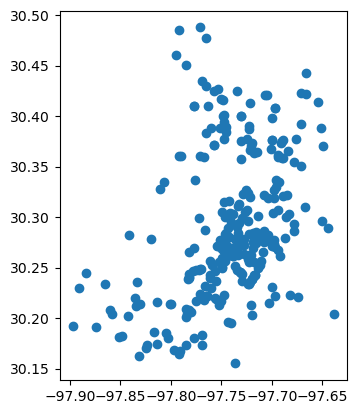

In [36]:
serious_bike_crashes.plot()

In [38]:
serious_bike_crashes.to_file("serious_bike_crashes.geojson", driver='GeoJSON')

In [37]:
serious_bike_crashes.plot()

,crash_id,crash_fatal_fl,crash_date,crash_time,case_id,rpt_latitude,rpt_longitude,rpt_block_num,rpt_street_pfx,rpt_street_name,rpt_street_sfx,crash_speed_limit,road_constr_zone_fl,latitude,longitude,street_name,street_nbr,street_name_2,street_nbr_2,crash_sev_id,sus_serious_injry_cnt,nonincap_injry_cnt,poss_injry_cnt,non_injry_cnt,unkn_injry_cnt,tot_injry_cnt,death_cnt,contrib_factr_p1_id,contrib_factr_p2_id,units_involved,atd_mode_category_metadata,pedestrian_fl,motor_vehicle_fl,motorcycle_fl,bicycle_fl,other_fl,point,apd_confirmed_fatality,apd_confirmed_death_count,motor_vehicle_death_count,motor_vehicle_serious_injury_count,bicycle_death_count,bicycle_serious_injury_count,pedestrian_death_count,pedestrian_serious_injury_count,motorcycle_death_count,motorcycle_serious_injury_count,other_death_count,other_serious_injury_count,onsys_fl,private_dr_fl,geometry
827,13187288,N,03/17/2013 06:55:00 PM,18:55:00,130761533,NaN,NaN,6800,E,SVRD EB,NaN,0.0,N,30.320907,-97.688898,US0290,NaN,BERKMAN DR,NaN,1,1,0.0,0.0,1.0,0.0,1.0,0,NaN,NaN,Bicycle & Passenger car,"[{""mode_id"": 5, ""mode_desc"": ""Bicycle"", ""unit_...",NaN,Y,NaN,Y,NaN,POINT (-97.6888975433771 30.320907270001),N,0,0,0,0,1,0,0,0,0,0,0,Y,N,POINT (-97.68890 30.32091)
1285,13197199,N,03/14/2013 05:08:00 PM,17:08:00,13-0731491,NaN,NaN,9900,NaN,MANCHACA,RD,0.0,N,30.173640,-97.823846,FM2304,9901.0,W SLAUGHTER LN,NaN,1,1,0.0,0.0,2.0,0.0,1.0,0,NaN,NaN,Bicycle & Passenger car,"[{""mode_id"": 5, ""mode_desc"": ""Bicycle"", ""unit_...",NaN,Y,NaN,Y,NaN,POINT (-97.82384609 30.17364007),N,0,0,0,0,1,0,0,0,0,0,0,Y,N,POINT (-97.82385 30.17364)
2408,13260930,N,03/16/2013 08:37:00 AM,08:37:00,130750803,NaN,NaN,3200,N,CAPITAL OF TX SB,HWY,0.0,N,30.335258,-97.806408,N CAPITAL OF TEXAS HWY,NaN,UNKNOWN,NaN,1,1,0.0,0.0,1.0,0.0,1.0,0,NaN,NaN,Bicycle & Large passenger vehicle,"[{""mode_id"": 5, ""mode_desc"": ""Bicycle"", ""unit_...",NaN,Y,NaN,Y,NaN,POINT (-97.80640819 30.33525758),N,0,0,0,0,1,0,0,0,0,0,0,N,N,POINT (-97.80641 30.33526)
2444,13267586,N,05/05/2013 08:46:00 PM,20:46:00,131251655,NaN,NaN,502,NaN,BRAMBLE,DR,30.0,N,30.206305,-97.779612,BRAMBLE DR,500.0,CEDARDALE DR,NaN,1,1,0.0,0.0,1.0,0.0,1.0,0,48.0,NaN,Large passenger vehicle & Bicycle,"[{""mode_id"": 2, ""mode_desc"": ""Large passenger ...",NaN,Y,NaN,Y,NaN,POINT (-97.77961246 30.20630479),N,0,0,0,0,1,0,0,0,0,0,0,N,N,POINT (-97.77961 30.20630)
2597,13245044,N,04/22/2013 06:38:00 PM,18:38:00,131121454,NaN,NaN,5800,NaN,MANCHACA,RD,35.0,N,30.213760,-97.800678,MENCHACA RD,5778.0,NaN,NaN,1,1,0.0,0.0,1.0,0.0,1.0,0,20.0,NaN,Large passenger vehicle & Bicycle,"[{""mode_id"": 2, ""mode_desc"": ""Large passenger ...",NaN,Y,NaN,Y,NaN,POINT (-97.80067809 30.21376007),N,0,0,0,0,1,0,0,0,0,0,0,N,N,POINT (-97.80068 30.21376)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
147298,19258450,N,11/30/2022 03:23:00 PM,15:23:00,223340863,NaN,NaN,10200.0,NaN,RESEARCH BLVD SVRD SB,BLVD,50.0,N,30.394209,-97.746928,US0183,NaN,GREAT HILLS TRL,NaN,1,1,0.0,0.0,1.0,0.0,1.0,0,NaN,NaN,Bicycle & Large passenger vehicle,"[{""mode_id"": 5, ""mode_desc"": ""Bicycle"", ""unit_...",NaN,Y,NaN,Y,NaN,POINT (-97.74692765650619 30.394208805124688),N,0,0,0,0,1,0,0,0,0,0,0,Y,N,POINT (-97.74693 30.39421)
148048,19315139,N,01/02/2023 01:27:00 AM,01:27:00,230020074,NaN,NaN,NaN,NaN,W RUNDBERG LN,NaN,-1.0,N,30.361611,-97.694352,W RUNDBERG LN,NaN,SLAYTON DR,NaN,1,1,0.0,0.0,1.0,0.0,1.0,0,33.0,74.0,Bicycle & Motor vehicle – other,"[{""mode_id"": 5, ""mode_desc"": ""Bicycle"", ""unit_...",NaN,Y,NaN,Y,NaN,POINT (-97.69435205447017 30.36161128041315),N,0,0,0,0,1,0,0,0,0,0,0,N,N,POINT (-97.69435 30.36161)
149028,19344475,N,01/19/2023 08:55:00 AM,08:55:00,230190415,NaN,NaN,NaN,E,3RD,ST,30.0,N,30.262428,-97.733793,E 3RD ST,1000.0,SAN MARCOS ST,NaN,1,1,0.0,0.0,1.0,0.0,1.0,0,NaN,NaN,Bicycle & Large passenger vehicle,"[{""mode_id"": 5, ""mo

<AxesSubplot:>

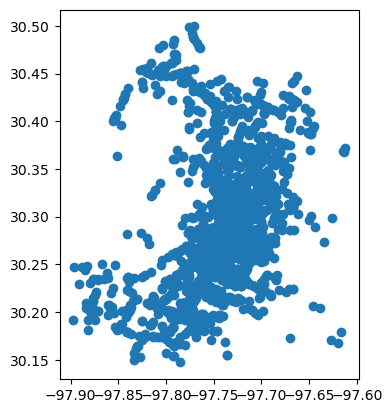

In [21]:
bike_crashes.plot()

In [ ]:
pedestrian_crashes

In [57]:
bike_ped_crashes_2020_onward = crash_data_geographic[(crash_data_geographic['crash_date'] > datetime.datetime(2020,1,1)) & ((crash_data_geographic['bicycle_fl'] == "Y") | (crash_data_geographic['pedestrian_fl'] == "Y")) ]

In [50]:
crash_data_geographic['crash_date']

'01/23/2014 09:14:00 PM'

<AxesSubplot:>

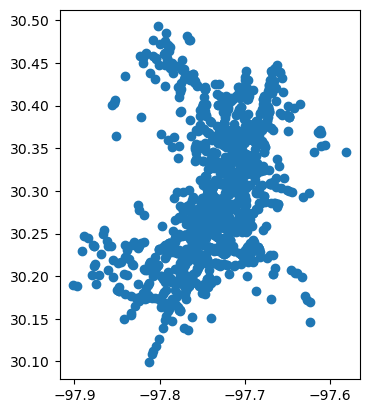

In [58]:
bike_ped_crashes_2020_onward.plot()

In [59]:
bike_ped_crashes_2020_onward.to_file("bike_pedestrian_crashes_2020_onward.geojson", driver="GeoJSON")

In [60]:
other_crashes = crash_data_geographic[crash_data_geographic['other_fl'] == "Y"]

In [68]:
y=0
for x in other_crashes['atd_mode_category_metadata']:
    print(x)
    y += 1
    if y > 10:
        break

[{"mode_id": 2, "mode_desc": "Large passenger vehicle", "unit_id": 2206920, "death_cnt": 0, "sus_serious_injry_cnt": 0, "nonincap_injry_cnt": 0, "poss_injry_cnt": 0, "non_injry_cnt": 0, "unkn_injry_cnt": 0, "tot_injry_cnt": 0}, {"mode_id": 9, "mode_desc": "Other/Unknown", "unit_id": 2206902, "death_cnt": 0, "sus_serious_injry_cnt": 0, "nonincap_injry_cnt": 0, "poss_injry_cnt": 0, "non_injry_cnt": 0, "unkn_injry_cnt": 0, "tot_injry_cnt": 0}, {"mode_id": 1, "mode_desc": "Passenger car", "unit_id": 2206903, "death_cnt": 0, "sus_serious_injry_cnt": 0, "nonincap_injry_cnt": 0, "poss_injry_cnt": 0, "non_injry_cnt": 0, "unkn_injry_cnt": 1, "tot_injry_cnt": 0}]
[{"mode_id": 2, "mode_desc": "Large passenger vehicle", "unit_id": 2208607, "death_cnt": 0, "sus_serious_injry_cnt": 0, "nonincap_injry_cnt": 0, "poss_injry_cnt": 0, "non_injry_cnt": 1, "unkn_injry_cnt": 0, "tot_injry_cnt": 0}, {"mode_id": 9, "mode_desc": "Other/Unknown", "unit_id": 2208600, "death_cnt": 0, "sus_serious_injry_cnt": 0, "